/home/jhansi/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


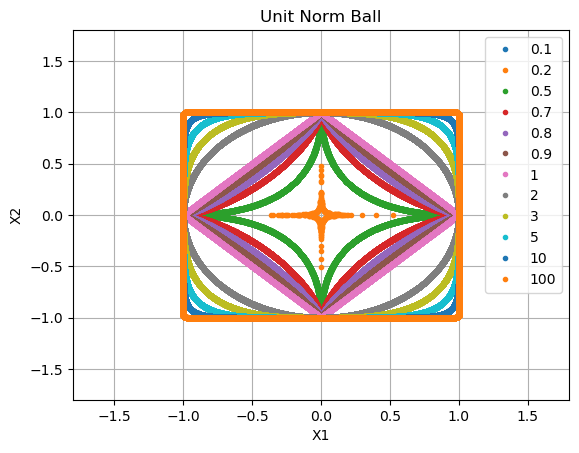

In [2]:
# Unit norm ball: Recall the definition of a unit norm ball from class that we defined in a normed linear
#space (X, ||.||): B ̄ = {x ∈ X : ||x|| ≤ 1}. Assume X = R2.
#(a) Write a function that accepts p and plots the ||.||p unit norm ball. Test with integer p ≥ 1 as well
#as 0 < p < 1. (3)
#(b) We claimed that for integer p ≥ 1 the unit norm ball is convex. Is this clear from the unit norm
#ball plots? What happens when 0 < p < 1? Print your observations. (2)

import random
import numpy as np
import matplotlib.pyplot as plt

# Input 
p = [0.1,0.2,0.5,0.7,0.8,0.9,1,2,3,5,10,100]

def Unit_Norm_Ball(p):
    points = np.random.randn(100000, 2)  # Generate random points with dimention 2
    norms = ((abs(points[:,0])**p)+(abs(points[:,1])**p))**(1/p)
    normalized_points = points / norms[:, np.newaxis]  # Normalize points
    x= normalized_points[norms <= 1]
    return x

for i in p:
    x=Unit_Norm_Ball(i)
    plt.plot(x[:,0],x[:,1],'.',label=i)
# Set plot limits and labels
plt.xlim([-1.8, 1.8])
plt.ylim([-1.8, 1.8])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Unit Norm Ball')
plt.grid(True)
plt.legend()
plt.show()


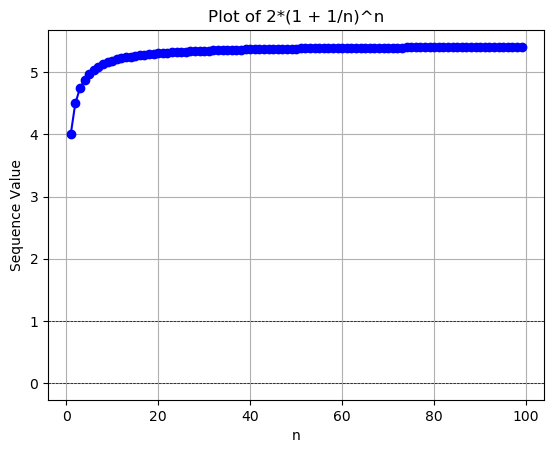

L1 norm of 2*(1 + 1/n)^n is: 1.436291853649851
The sequence is incomplete over C[0,1]


In [3]:
#Completeness: Recall from class that a metric space (X, d) is said to be complete if 
#all Cauchy se-quences in X converge to a point in X. Show with a numerical example that the space of continuous
#functions defined on the closed interval [0, 1] and denoted C[0, 1] is incomplete with respect to the
#metric derived from the L1 norm (i.e., d(f , g) = || f − g||1 =R10| f(x) − g(x)|dx for any f , g ∈ C[0, 1]).
#Code your example and demonstrate the result either using a plot or numerically. (5)

import numpy as np
import matplotlib.pyplot as plt

# Generate the sequence (1 + 1/n) for n from 1 to 100
n_values = np.arange(1, 100)
sequence = 2*(1 + 1 / n_values)**n_values

# Create a plot to visualize the sequence
plt.plot(n_values, sequence, marker='o', linestyle='-', color='b')
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
plt.axhline(1, color='k', linestyle='--', linewidth=0.5)
plt.xlabel('n')
plt.ylabel('Sequence Value')
plt.title('Plot of 2*(1 + 1/n)^n')

# Show the plot
plt.grid()
plt.show()

import numpy as np

# Define the value of n
n_value = 1
m_value = 10000
# Calculate the sequence value for the specified n
f = 2*(1 + 1 / n_value)**n_value
g = 2*(1 + 1 / m_value)**m_value

# Calculate the L1 norm
l1_norm = abs(f-g)

# Print the L1 norm result
print(f"L1 norm of 2*(1 + 1/n)^n is: {l1_norm}")

if(l1_norm <= 1) and (l1_norm >= 0):
    print('THe sequence is complete over C[0,1]')
else:
    print('The sequence is incomplete over C[0,1]')


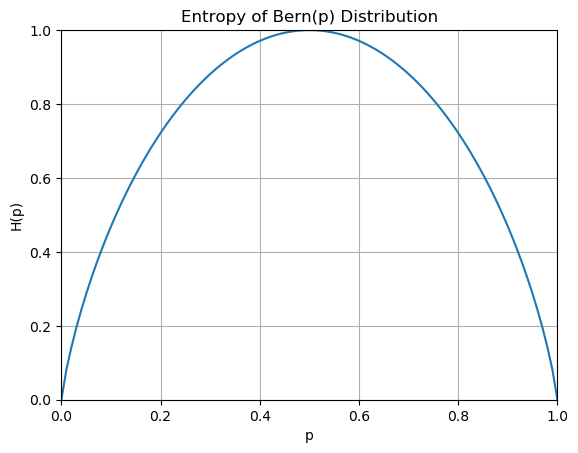

In [4]:
#Entropy of a discrete RV: Recall the definition of entropy of a discrete RV X from class, H(X) =− ∑x∈X
#p(x) log p(x), where p(x) is the probability mass function (PMF) of X, and X is the set of
#possible values that the random variable X can take.
#(a) Write a function that accepts a PMF as input and outputs the entropy in bits. Do check for the
#condition of a value being assigned zero probability. (3)
#(b) Now use the above function to plot the entropy of X ∼ Bern(p) as a function of p. Where does
#this plot attain its maximum? (2)
N = 100
a = np.linspace(0,1,N)
pmf = [a,(1-a)]
pmf = np.array(pmf).T
def Entropy(pmf):
    entropy = 0
    for i in pmf:
        if (i==0):
            entropy = entropy + 0
        else:
            entropy = entropy+(i*np.log(1/i)/np.log(2))
    return entropy
i=1
H = np.zeros(N)
while(i<N):
    H[i] = Entropy(pmf[i,:])
    i=i+1
plt.plot(a,H,)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('p')
plt.ylabel('H(p)')
plt.title('Entropy of Bern(p) Distribution')
plt.grid(True)
plt.show()

ENTROPY OF LEFT : 7.258294104749939
ENTROPY OF RIGHT: 7.278625531696125


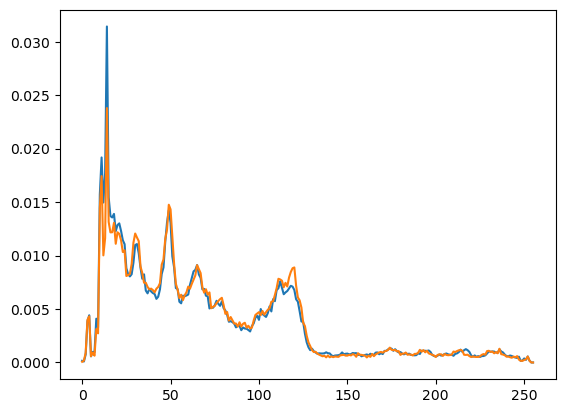

In [14]:
#Image entropy: Download a gray scale image from the link provided in the instructions. By gray
#scale is meant that the image has one intensity channel. Further, the pixel intensities are in the range[0, 255].
#(a) Write a function that accepts an image as input and returns its normalized histogram. Note that
#the normalized histogram is found by dividing the original histogram by the total number of
#pixels in the image. (3)

#(b) Use your entropy function from the previous problem to find the image entropy. Experiment
#with different gray scale images from the aforementioned link and note your observations. (2)

from PIL import Image
import cv2
# Open an image file
left = cv2.imread('left.png')
right = cv2.imread('right.png')
if left is not None:
    height1, width1, channels1 = left.shape
    height2, width2, channels2 = right.shape
else:
    print("Failed to load image.")
image_1 = left[:,:,0]
image_2 = right[:,:,0]
def calculate_histogram(image):
    histogram = [0] * 256  # Initialize histogram with 256 bins (0-255)
    for row in image:
        for value in row:
            histogram[value] += 1
    return histogram
histogram_image_1 = calculate_histogram(image_1)
histogram_image_2 = calculate_histogram(image_2)
normalised_hist_1 = np.array(histogram_image_1)/ (height1*width1)
normalised_hist_2 = np.array(histogram_image_2)/ (height2*width2)
plt.plot(normalised_hist_1,)
plt.plot(normalised_hist_2)
def entropy(pmf_matrix):
    pmf_matrix = np.array(pmf_matrix)
    non_zero_entries = pmf_matrix[pmf_matrix > 0]  # Filter out zero probabilities
    entropy_values = -non_zero_entries * np.log2(non_zero_entries)  # Calculate entropy values
    entropy_sum = np.sum(entropy_values)  # Sum up the entropy values
    return entropy_sum
entropy_image_1 = entropy(normalised_hist_1)
entropy_image_2 = entropy(normalised_hist_2)
print('ENTROPY OF LEFT :',entropy_image_1)
print('ENTROPY OF RIGHT:',entropy_image_2)

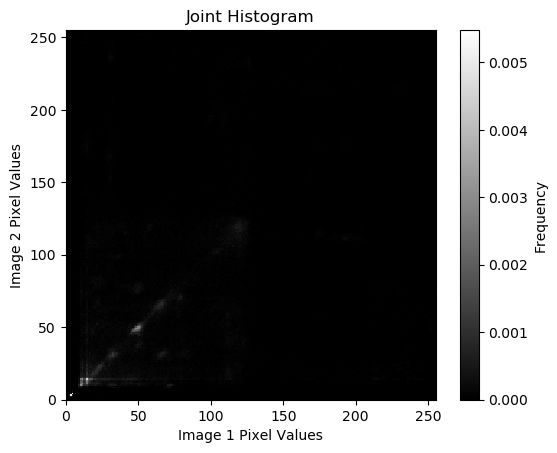

21.80302901584309


In [47]:
#Joint PMF and joint entropy: For this problem, work with the given stereo image pair labeled
#left.png and right.png respectively. As in the previous question, both images are gray scale.
#(a) Write a function that accepts this stereo image pair as input, and outputs the normalized joint
#histogram in addition to plotting it. (3)
#(b) Write a function that accepts the joint PMF of a pair of random variables as input and outputs
#the joint entropy. (1)
#(c) Test your joint entropy function using the normalized joint histogram computed in Problem 5
#(a). (1)


# Load the two grayscale images
image1 = cv2.imread('left.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('right.png', cv2.IMREAD_GRAYSCALE)

# Define the number of bins and the range for pixel values
num_bins = 256
pixel_range = (0, 255)

def joint_hist(image1,image2):
    # Initialize an empty joint histogram
    joint_histogram = np.zeros((num_bins, num_bins), dtype=np.uint32)
    
    # Iterate through each pixel in the images and populate the joint histogram
    for i in range(image1.shape[0]):
        for j in range(image1.shape[1]):
            pixel_value1 = image1[i, j]
            pixel_value2 = image2[i, j]
            joint_histogram[pixel_value1, pixel_value2] += 1
    total_pixels = 256 * 256
    normalised_histogram = joint_histogram / total_pixels
    return normalised_histogram

normalised_joint_histogram = joint_hist(image1,image2)
# Plot the joint histogram as an image
plt.imshow(normalised_joint_histogram, cmap='gray', extent=[0, 255, 0, 255], origin='lower')
plt.colorbar(label='Frequency')
plt.xlabel('Image 1 Pixel Values')
plt.ylabel('Image 2 Pixel Values')
plt.title('Joint Histogram')
plt.show()
def joint_entropy(joint_pmf):
    joint_entropy = -np.sum(joint_pmf * np.log2(joint_pmf + 1e-10))
    return joint_entropy
joint_entropy = joint_entropy(normalised_joint_histogram)
print(joint_entropy)

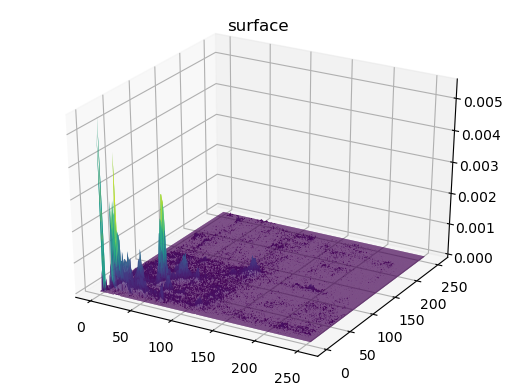

In [48]:
from mpl_toolkits import mplot3d
x = np.linspace(0,255,256)
y = np.linspace(0,255,256)
X,Y = np.meshgrid(x, y)
Z = normalised_joint_histogram

fig = plt.figure()


ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface');



In [6]:
#Conditional PMF and conditional entropy: Continue to work with the stereo image pair.
#(a) Write a function that accepts as input the joint PMF of a pair of random variables, the index of the
#conditioning random variable, and the value of the conditioning random variable. The function
#must output the appropriate conditional PMF. (3)
#(b) Write a function that accepts as input the joint PMF and the index of the conditioning RV, and
#outputs the conditional entropy. (1)

#c) Test your conditional entropy function using the normalized joint histogram computed in Prob-
#lem 4 (a), for your choice of the conditioning RV. (1)

def conditional_pmf(joint_pmf,y_condition):
    conditional_pmf = joint_pmf[:, y_condition] / np.sum(joint_pmf[:, y_condition])
    return conditional_pmf
def conditional_entropy(joint_pmf,y_index):
    marginal_pmf_y = np.sum(joint_pmf, axis=0)
    conditional_entropy = 0.0
    conditional_pmf_x_given_y = joint_pmf[:, y_index] / marginal_pmf_y[y_index]
    conditional_entropy_y = -np.sum(conditional_pmf_x_given_y * np.log2(conditional_pmf_x_given_y + 1e-10))
    conditional_entropy += conditional_entropy_y * marginal_pmf_y[y_index]
    return conditional_entropy
cond_entropy = conditional_entropy(normalised_joint_histogram,24)
print(cond_entropy)

0.06791133590583003


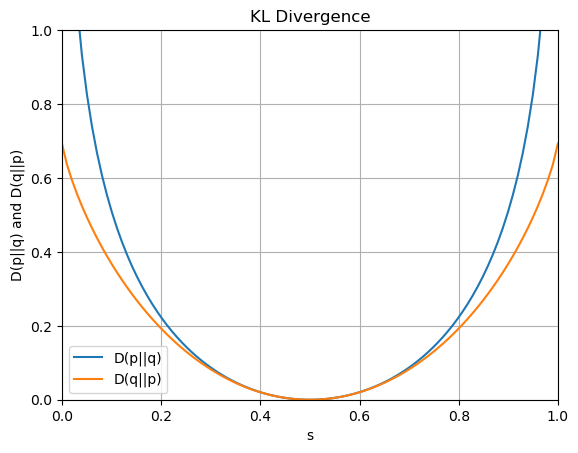

0.010469304502753025 0.009988102515014308


In [7]:
#KL divergence: We showed in class that for PMFs p and q defined on X , D(p||q) ≥ 0, D(q||p) ̸=
#D(p||q). This problem explores these properties experimentally.
#(a) Write a function that accepts as input two PMFs p and q as input, and outputs D(p||q). (1)
#(b) As discussed in class, let p ∼ Bern(r) and q ∼ Bern(s). For a fixed value of r, vary s and do the
#following: (4)
#i. Plot D(p||q), D(q||p).
#ii. Verify that D(p||q), D(q||p) are indeed non-negative.
#iii. Verify that D(p||q) ̸= D(q||p) and are both equal to zero only when r = s.
#iv. Finally, find D(p||q) and D(q||p) where p and q are the normalized histograms of left.png
#and right.png respectively. Do you think D(p||q) is a good metric for image similarity?
#Print your response.

import numpy as np

def kl_divergence(p, q):
    # Ensure that both p and q are NumPy arrays with the same shape
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)

    # Ensure that the arrays have the same shape
    if p.shape != q.shape:
        raise ValueError("Input vectors must have the same shape.")

    # Avoid division by zero and log of zero by adding a small epsilon
    epsilon = 1e-10

    # Calculate the KL divergence
    kl = np.sum(p * np.log((p + epsilon) / (q + epsilon)))

    return kl


# q ∼ Bern(s) and p ~ Bern(r)
# Fixing r
r = 0.5

# Varying s
s = np.linspace(0,1,N)


# Initialize arrays to store KL divergences
kl_p_to_q = []
kl_q_to_p = []

# Calculate KL divergences for varying s values
for i in s:
    p = np.array([r,1-r]).T
    q = np.array([i,1-i]).T
    
    kl_pq = kl_divergence(p,q)
    kl_qp = kl_divergence(q,p)
    
    kl_p_to_q.append(kl_pq)
    kl_q_to_p.append(kl_qp)

# plot D(p||q) and D(q||q)
plt.plot(s,kl_p_to_q, label = 'D(p||q)')
plt.plot(s,kl_q_to_p, label = 'D(q||p)')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('s')
plt.ylabel('D(p||q) and D(q||p)')
plt.title('KL Divergence')
plt.grid(True)
plt.legend()
plt.show()

# left and Right images KL divergence
kl_left_to_right = kl_divergence(normalised_hist_1 ,normalised_hist_2)

kl_right_to_left = kl_divergence(normalised_hist_2 ,normalised_hist_1)

print(kl_left_to_right,kl_right_to_left)